https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m

# Pré-processamento

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

try:
  df = pd.read_csv('/content/drive/MyDrive/Datasets/BankChurners.csv')
except:
  drive.mount('/content/drive')
  df = pd.read_csv('/content/drive/MyDrive/Datasets/BankChurners.csv')

Mounted at /content/drive


In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df.rename(columns={'CLIENTNUM' : 'ID do cliente',
                   'Attrition_Flag' : 'Cliente deu churn?',
                   'Customer_Age' : 'Idade',
                   'Gender' : 'Sexo',
                   'Dependent_count' : 'Número de dependentes',
                   'Education_Level' : 'Nivel de escolaridade',
                   'Marital_Status' : 'Estado civil',
                   'Income_Category' : 'Categoria da renda',
                   'Card_Category' : 'Categoria do cartão',
                   'Months_on_book' : 'Meses desde o registro',
                   'Total_Relationship_Count' : 'Número total de relações mantidos com a operadora',
                   'Months_Inactive_12_mon' : 'Meses inativos dentre os 12 últimos',
                   'Contacts_Count_12_mon' : 'Número de contatos nos últimos 12 meses',
                   'Credit_Limit' : 'Limite do cartão',
                   'Total_Revolving_Bal' : 'Saldo rotativo total',
                   'Avg_Open_To_Buy' : 'Proporção média de abertura para compra',
                   'Total_Amt_Chng_Q4_Q1' : 'Valor total alterado do 4º para o 1º trimestres',
                   'Total_Trans_Amt' : 'Valor total das transações',
                   'Total_Trans_Ct' : 'Contagem total das transações',
                   'Total_Ct_Chng_Q4_Q1' : 'Contagem total alterada do 4º para o 1º trimestres',
                   'Avg_Utilization_Ratio' : 'Taxa média de utilização',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1' : 'Classificação 1 do atributo Attrition_Flag usando Naive Bayes sobre as colunas Card_Category, Contacts_Count_12_mon, Dependent_count, Education_Level e Months_Inactive_12_mon',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2' : 'Classificação 2 do atributo Attrition_Flag usando Naive Bayes sobre as colunas Card_Category, Contacts_Count_12_mon, Dependent_count, Education_Level e Months_Inactive_12_mon'},
          inplace=True)

In [ ]:
df.head()

,ID do cliente,Cliente deu churn?,Idade,Sexo,Número de dependentes,Nivel de escolaridade,Estado civil,Categoria da renda,Categoria do cartão,Meses desde o registro,...,Limite do cartão,Saldo rotativo total,Proporção média de abertura para compra,Valor total alterado do 4º para o 1º trimestres,Valor total das transações,Contagem total das transações,Contagem total alterada do 4º para o 1º trimestres,Taxa média de utilização,"Classificação 1 do atributo Attrition_Flag usando Naive Bayes sobre as colunas Card_Category, Contacts_Count_12_mon, Dependent_count, Education_Level e Months_Inactive_12_mon","Classificação 2 do atributo Attrition_Flag usando Naive Bayes sobre as colunas Card_Category, Contacts_Count_12_mon, Dependent_count, Education_Level e Months_Inactive_12_mon"
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


A princípio, o dataset foi utilizado para a previsão do churn de clientes, por isso, há duas colunas relacionadas a resultados de modelos de classificação, ambas as colunas foram retiradas nesse momento para não atrapalhar o trabalho que será feito sobre o dataset.

In [ ]:
df.drop(columns=['Classificação 1 do atributo Attrition_Flag usando Naive Bayes sobre as colunas Card_Category, Contacts_Count_12_mon, Dependent_count, Education_Level e Months_Inactive_12_mon',
                 'Classificação 2 do atributo Attrition_Flag usando Naive Bayes sobre as colunas Card_Category, Contacts_Count_12_mon, Dependent_count, Education_Level e Months_Inactive_12_mon'],
        inplace=True)

## Ajuste do tipo das colunas

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID do cliente                                       10127 non-null  int64  
 1   Cliente deu churn?                                  10127 non-null  object 
 2   Idade                                               10127 non-null  int64  
 3   Sexo                                                10127 non-null  object 
 4   Número de dependentes                               10127 non-null  int64  
 5   Nivel de escolaridade                               10127 non-null  object 
 6   Estado civil                                        10127 non-null  object 
 7   Categoria da renda                                  10127 non-null  object 
 8   Categoria do cartão                                 10127 non-null  object 


In [ ]:
df['Cliente deu churn?'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
df['Cliente deu churn?'] = df['Cliente deu churn?'].map(lambda x : True if x == 'Attrited Customer' else False)
df.head()

,ID do cliente,Cliente deu churn?,Idade,Sexo,Número de dependentes,Nivel de escolaridade,Estado civil,Categoria da renda,Categoria do cartão,Meses desde o registro,...,Meses inativos dentre os 12 últimos,Número de contatos nos últimos 12 meses,Limite do cartão,Saldo rotativo total,Proporção média de abertura para compra,Valor total alterado do 4º para o 1º trimestres,Valor total das transações,Contagem total das transações,Contagem total alterada do 4º para o 1º trimestres,Taxa média de utilização
0,768805383,False,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,False,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,False,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,False,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,False,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
int_cols = ['Idade',
             'Número de dependentes',
             'Meses desde o registro',
             'Número total de relações mantidos com a operadora',
             'Meses inativos dentre os 12 últimos',
             'Número de contatos nos últimos 12 meses',
             'Contagem total das transações',
             'Contagem total alterada do 4º para o 1º trimestres']

float_cols = ['Limite do cartão',
               'Saldo rotativo total',
               'Proporção média de abertura para compra',
               'Valor total alterado do 4º para o 1º trimestres',
               'Valor total das transações',
               'Taxa média de utilização']

def ajuste_tipo_coluna(df):
  for col in df.columns:
    if col in int_cols:
      df[col] = int(df[col])
    elif col in float_cols:
      df[col] = float(df[col])

# df[int_cols] = df[int_cols].map(lambda x : int(x))
# df[float_cols] = df[float_cols].map(lambda x : float(x))
# df[int_cols].apply(lambda x : int(x))
# df.apply(lambda x : int(x))
for col in df.columns:
  if col in int_cols:
    df[col] = df[col].astype(int)
  elif col in float_cols:
    df[col] = df[col].astype(float)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID do cliente                                       10127 non-null  int64  
 1   Cliente deu churn?                                  10127 non-null  bool   
 2   Idade                                               10127 non-null  int64  
 3   Sexo                                                10127 non-null  object 
 4   Número de dependentes                               10127 non-null  int64  
 5   Nivel de escolaridade                               10127 non-null  object 
 6   Estado civil                                        10127 non-null  object 
 7   Categoria da renda                                  10127 non-null  object 
 8   Categoria do cartão                                 10127 non-null  object 


## Tratamento de dados faltantes e dados duplicados

In [ ]:
df.isna().sum()

ID do cliente                                         0
Cliente deu churn?                                    0
Idade                                                 0
Sexo                                                  0
Número de dependentes                                 0
Nivel de escolaridade                                 0
Estado civil                                          0
Categoria da renda                                    0
Categoria do cartão                                   0
Meses desde o registro                                0
Número total de relações mantidos com a operadora     0
Meses inativos dentre os 12 últimos                   0
Número de contatos nos últimos 12 meses               0
Limite do cartão                                      0
Saldo rotativo total                                  0
Proporção média de abertura para compra               0
Valor total alterado do 4º para o 1º trimestres       0
Valor total das transações                      

In [ ]:
df.duplicated().sum()

0

# Análise Exploratória

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

In [ ]:
df.nunique()

ID do cliente                                         10127
Cliente deu churn?                                        2
Idade                                                    45
Sexo                                                      2
Número de dependentes                                     6
Nivel de escolaridade                                     7
Estado civil                                              4
Categoria da renda                                        6
Categoria do cartão                                       4
Meses desde o registro                                   44
Número total de relações mantidos com a operadora         6
Meses inativos dentre os 12 últimos                       7
Número de contatos nos últimos 12 meses                   7
Limite do cartão                                       6205
Saldo rotativo total                                   1974
Proporção média de abertura para compra                6813
Valor total alterado do 4º para o 1º tri

In [ ]:
for col in df.select_dtypes(include='object').columns:
  print(f'{col}\n->{df[col].unique()}\n')

Sexo
->['M' 'F']

Nivel de escolaridade
->['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Estado civil
->['Married' 'Single' 'Unknown' 'Divorced']

Categoria da renda
->['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Categoria do cartão
->['Blue' 'Gold' 'Silver' 'Platinum']



In [ ]:
def converte_sifrao(valor):

  match valor:
    case '$60K - $80K':
      return'U$60K - U$80K'
    case 'Less than $40K':
      return 'Less than U$40K'
    case '$80K - $120K':
      return 'U$80K - U$120K'
    case '$40K - $60K':
      return 'U$40K - U$60K'
    case '$120K +':
      return 'U$120K +'

df['Categoria da renda'] = df['Categoria da renda'].apply(converte_sifrao)
df['Categoria da renda']

0          U$60K - U$80K
1        Less than U$40K
2         U$80K - U$120K
3        Less than U$40K
4          U$60K - U$80K
              ...       
10122      U$40K - U$60K
10123      U$40K - U$60K
10124    Less than U$40K
10125      U$40K - U$60K
10126    Less than U$40K
Name: Categoria da renda, Length: 10127, dtype: object

In [ ]:
df.shape

(10127, 21)

In [ ]:
df_numerico = df[int_cols + float_cols]

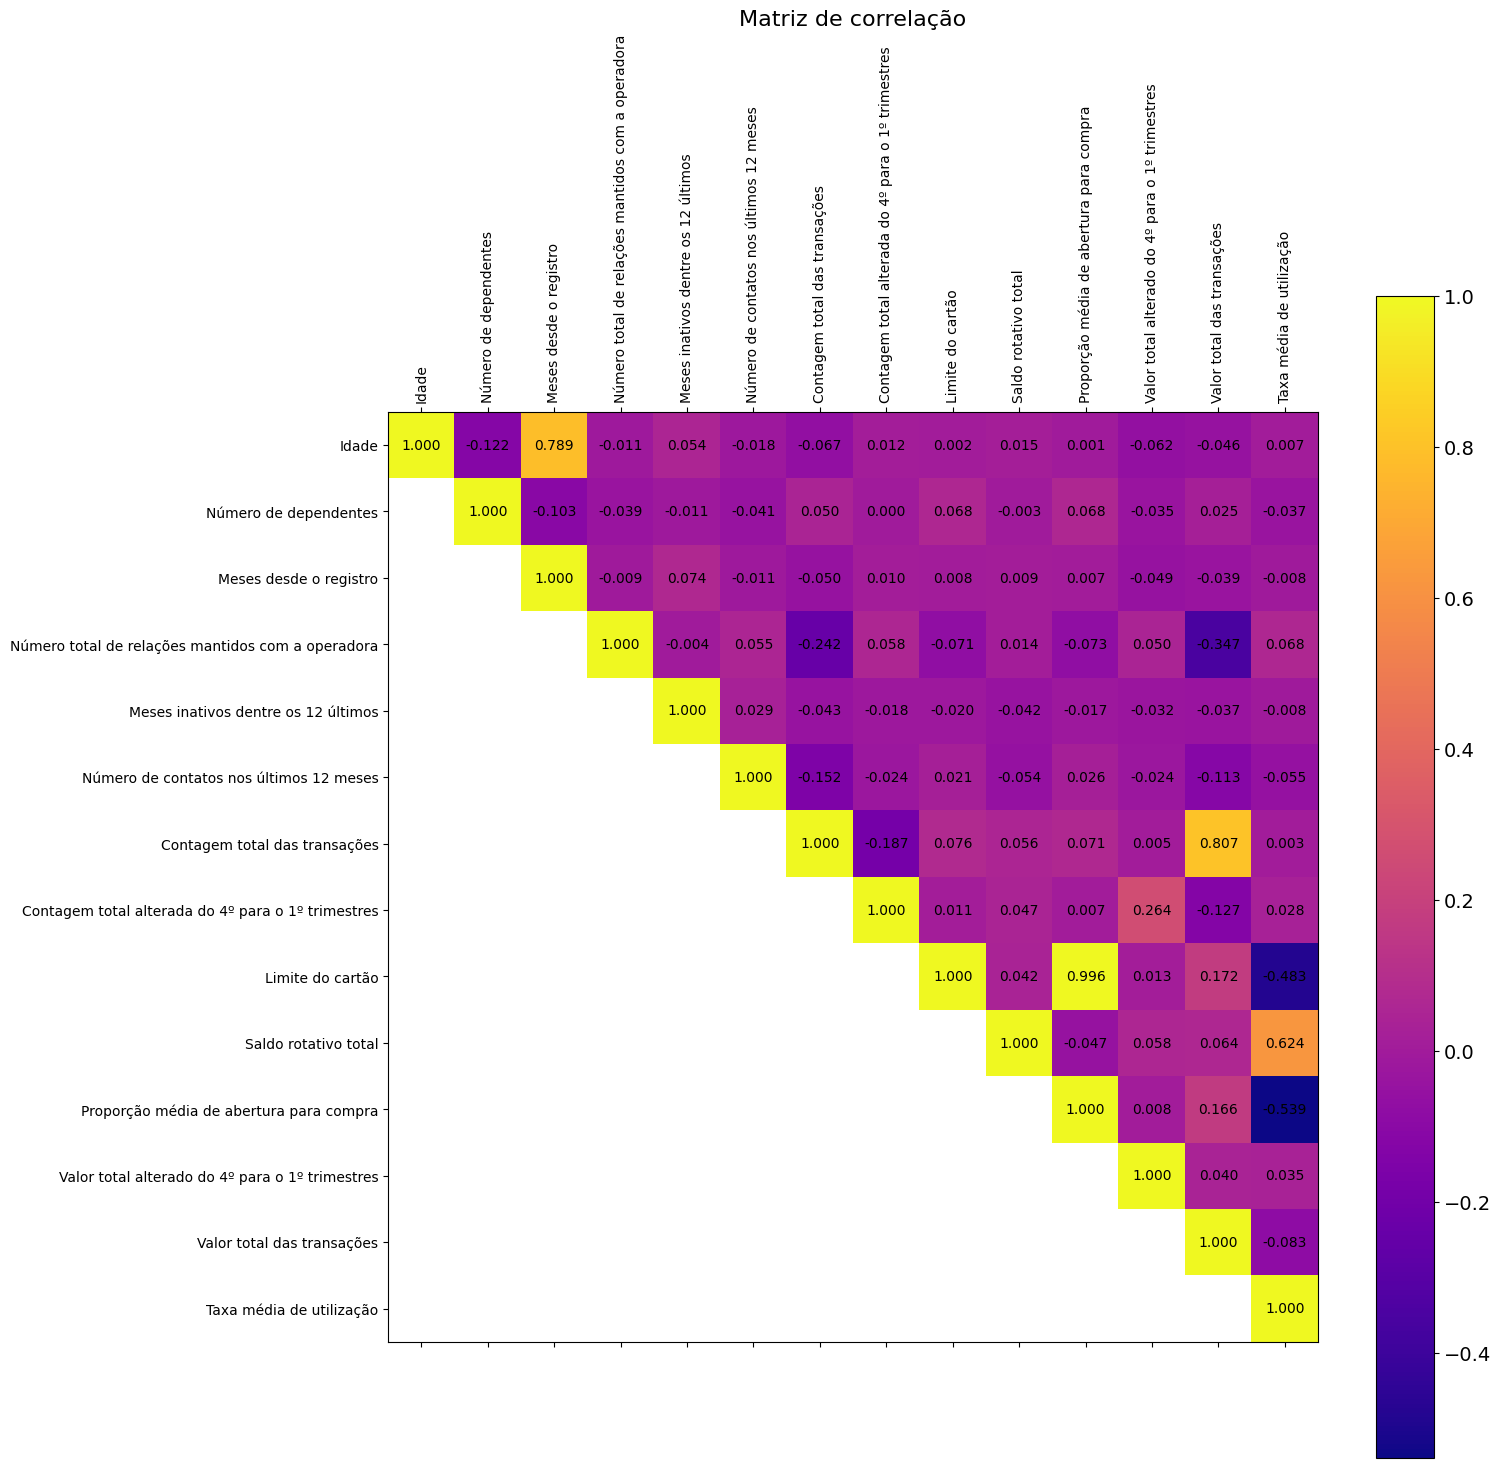

In [ ]:
fig = plt.figure(figsize=(15, 15))

plt.matshow(df_numerico.corr().where(np.triu(np.ones(df_numerico.corr().shape)).astype(bool)), fignum=fig.number, cmap='plasma')

plt.yticks(range(df_numerico.select_dtypes(['number']).shape[1]), df_numerico.select_dtypes(['number']).columns, fontsize=10)
plt.xticks(range(df_numerico.select_dtypes(['number']).shape[1]), df_numerico.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.title('Matriz de correlação', fontsize=16);
plt.grid(False)

for (i, j), z in np.ndenumerate(df_numerico.corr().where(np.triu(np.ones(df_numerico.corr().shape)).astype(bool))):
  if i <= j:
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

colorbar = plt.colorbar()
colorbar.ax.tick_params(labelsize=14)

Explicar correlações...

In [ ]:
df_numerico.shape

(10127, 14)

In [ ]:
fig = make_subplots(rows=7, cols=2)

for index, col in enumerate(df_numerico.columns):
  boxplot = go.Box(y=df_numerico[col], name=col)
  fig.add_trace(boxplot, row=(index // 2) + 1, col=(index % 2) + 1)

# Personalizar layout
fig.update_layout(
    title_text='Múltiplos Histogramas com Escalas Próprias',
    autosize=False,
    width=1400,
    height=2000,
    showlegend=True
)

# Mostrar figura
fig.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()
dados_normalizados = min_max_scaler.fit_transform(df_numerico)

df_numerico_normalizado = pd.DataFrame(dados_normalizados, columns=df_numerico.columns, index=df_numerico.index)
df_numerico_normalizado.head()

,Idade,Número de dependentes,Meses desde o registro,Número total de relações mantidos com a operadora,Meses inativos dentre os 12 últimos,Número de contatos nos últimos 12 meses,Contagem total das transações,Contagem total alterada do 4º para o 1º trimestres,Limite do cartão,Saldo rotativo total,Proporção média de abertura para compra,Valor total alterado do 4º para o 1º trimestres,Valor total das transações,Taxa média de utilização
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.248062,0.333333,0.340190,0.308701,0.345116,0.392994,0.035273,0.061061
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.178295,1.000000,0.206112,0.343266,0.214093,0.453636,0.043452,0.105105
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.077519,0.666667,0.059850,0.000000,0.098948,0.763615,0.076611,0.000000
3,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.077519,0.666667,0.056676,1.000000,0.022977,0.413600,0.036775,0.760761
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.139535,0.666667,0.099091,0.000000,0.136557,0.640271,0.017025,0.000000


In [ ]:
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)']

fig = go.Figure()

for col, cls in zip(df_numerico_normalizado.columns, colors):
        fig.add_trace(go.Box(
            y=df_numerico_normalizado[col],
            name=col,
            jitter=0.5,
            whiskerwidth=0.5,
            # fillcolor=cls,
            marker_size=1.7,
            line_width=1.5
            )
        )

fig.update_layout(
    title='Points Scored by the Top 9 Scoring NBA Players in 2012',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        dtick=0.2,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig.show()

In [ ]:
num_linhas = 7
num_colunas = 2

# fig = make_subplots(rows=num_linhas, cols=num_colunas, subplot_titles=df_numerico.columns)
fig = make_subplots(rows=num_linhas, cols=num_colunas)

traces = []

for index, col in enumerate(df_numerico.columns):

  histograma = go.Histogram(
      x=df_numerico[col],
      name=col
      )

  linha = (index // 2) + 1
  coluna = (index % 2) + 1

  fig.add_trace(histograma, row=linha, col=coluna)

  fig.update_xaxes(title_text=col, row=linha, col=coluna)
  # fig.update_yaxes(title_text='Contagem', row=linha, col=coluna)

fig.update_layout(
    title_text='Histograma dos atributos numéricos',
    autosize=True,
    # width=1400,
    height=2000,
    showlegend=True
)

fig.show()

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID do cliente                                       10127 non-null  int64  
 1   Cliente deu churn?                                  10127 non-null  bool   
 2   Idade                                               10127 non-null  int64  
 3   Sexo                                                10127 non-null  object 
 4   Número de dependentes                               10127 non-null  int64  
 5   Nivel de escolaridade                               10127 non-null  object 
 6   Estado civil                                        10127 non-null  object 
 7   Categoria da renda                                  9015 non-null   object 
 8   Categoria do cartão                                 10127 non-null  object 


In [ ]:
object_cols = ['Cliente deu churn?',
               'Sexo',
               'Nivel de escolaridade',
               'Estado civil',
               'Categoria da renda',
               'Categoria do cartão']

In [ ]:
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}]*3]*2)

for index, col in enumerate(object_cols):

    df_agrupado = df.groupby(col).count().reset_index()

    pie = go.Pie(
        labels=df_agrupado.iloc[:,0],
        values=df_agrupado.iloc[:,1],
        name=col)

    fig.add_trace(pie, row=(index // 3) + 1, col=(index % 3) + 1)

fig.update_traces(hole=.4)

# Personalizar layout
fig.update_layout(
    title_text='Múltiplos Histogramas com Escalas Próprias',
    autosize=False,
    width=1200,
    height=800,
    showlegend=True
)

# Mostrar figura
fig.show()

# Preparação dos dados

In [ ]:
df.head()

,ID do cliente,Cliente deu churn?,Idade,Sexo,Número de dependentes,Nivel de escolaridade,Estado civil,Categoria da renda,Categoria do cartão,Meses desde o registro,...,Meses inativos dentre os 12 últimos,Número de contatos nos últimos 12 meses,Limite do cartão,Saldo rotativo total,Proporção média de abertura para compra,Valor total alterado do 4º para o 1º trimestres,Valor total das transações,Contagem total das transações,Contagem total alterada do 4º para o 1º trimestres,Taxa média de utilização
0,768805383,False,45,M,3,High School,Married,U$60K - U$80K,Blue,39,...,1,3,12691.0,777.0,11914.0,1.335,1144.0,42,1,0.061
1,818770008,False,49,F,5,Graduate,Single,Less than U$40K,Blue,44,...,1,2,8256.0,864.0,7392.0,1.541,1291.0,33,3,0.105
2,713982108,False,51,M,3,Graduate,Married,U$80K - U$120K,Blue,36,...,1,0,3418.0,0.0,3418.0,2.594,1887.0,20,2,0.000
3,769911858,False,40,F,4,High School,Unknown,Less than U$40K,Blue,34,...,4,1,3313.0,2517.0,796.0,1.405,1171.0,20,2,0.760
4,709106358,False,40,M,3,Uneducated,Married,U$60K - U$80K,Blue,21,...,1,0,4716.0,0.0,4716.0,2.175,816.0,28,2,0.000


In [ ]:
df_agrupamento = df_numerico_normalizado.copy()
df_agrupamento.head()

,Idade,Número de dependentes,Meses desde o registro,Número total de relações mantidos com a operadora,Meses inativos dentre os 12 últimos,Número de contatos nos últimos 12 meses,Contagem total das transações,Contagem total alterada do 4º para o 1º trimestres,Limite do cartão,Saldo rotativo total,Proporção média de abertura para compra,Valor total alterado do 4º para o 1º trimestres,Valor total das transações,Taxa média de utilização
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.248062,0.333333,0.340190,0.308701,0.345116,0.392994,0.035273,0.061061
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.178295,1.000000,0.206112,0.343266,0.214093,0.453636,0.043452,0.105105
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.077519,0.666667,0.059850,0.000000,0.098948,0.763615,0.076611,0.000000
3,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.077519,0.666667,0.056676,1.000000,0.022977,0.413600,0.036775,0.760761
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.139535,0.666667,0.099091,0.000000,0.136557,0.640271,0.017025,0.000000


In [ ]:
df_agrupamento['Cliente deu churn?'] = df['Cliente deu churn?'].map(lambda x : 1 if x == True else 0)
df_agrupamento.tail()

,Idade,Número de dependentes,Meses desde o registro,Número total de relações mantidos com a operadora,Meses inativos dentre os 12 últimos,Número de contatos nos últimos 12 meses,Contagem total das transações,Contagem total alterada do 4º para o 1º trimestres,Limite do cartão,Saldo rotativo total,Proporção média de abertura para compra,Valor total alterado do 4º para o 1º trimestres,Valor total das transações,Taxa média de utilização,Cliente deu churn?
10122,0.510638,0.4,0.627907,0.4,0.333333,0.500000,0.829457,0.0,0.077536,0.735399,0.062266,0.206947,0.832647,0.462462,0
10123,0.319149,0.4,0.279070,0.6,0.333333,0.500000,0.457364,0.0,0.085819,0.868494,0.060499,0.236679,0.459219,0.511512,1
10124,0.382979,0.2,0.534884,0.8,0.500000,0.666667,0.387597,0.0,0.120042,0.000000,0.156637,0.241095,0.544175,0.000000,1
10125,0.085106,0.4,0.534884,0.6,0.500000,0.500000,0.403101,0.0,0.116172,0.000000,0.152928,0.157492,0.438689,0.000000,1
10126,0.361702,0.4,0.279070,1.0,0.333333,0.666667,0.395349,0.0,0.270566,0.779102,0.244082,0.206947,0.544342,0.189189,1


## Transformação dos atributos categóricos

In [ ]:
object_cols.remove('Cliente deu churn?')

In [ ]:
object_cols

['Sexo',
 'Nivel de escolaridade',
 'Estado civil',
 'Categoria da renda',
 'Categoria do cartão']

In [ ]:
for col in object_cols:
  print(df[col].unique())

['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['U$60K - U$80K' 'Less than U$40K' 'U$80K - U$120K' 'U$40K - U$60K'
 'U$120K +' None]
['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
df_sem_unknown = df[(df['Nivel de escolaridade'] != 'Unknown') &
                    (df['Estado civil'] != 'Unknown') &
                    (df['Categoria da renda'] != 'Unknown')]

In [ ]:
for col in object_cols:
  print(df_sem_unknown[col].unique())

['M' 'F']
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']
['U$60K - U$80K' 'Less than U$40K' 'U$80K - U$120K' 'U$40K - U$60K' None
 'U$120K +']
['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
df_categoricos_transformados = pd.get_dummies(df_sem_unknown[object_cols])
df_categoricos_transformados.head()

,Sexo_F,Sexo_M,Nivel de escolaridade_College,Nivel de escolaridade_Doctorate,Nivel de escolaridade_Graduate,Nivel de escolaridade_High School,Nivel de escolaridade_Post-Graduate,Nivel de escolaridade_Uneducated,Estado civil_Divorced,Estado civil_Married,Estado civil_Single,Categoria da renda_Less than U$40K,Categoria da renda_U$120K +,Categoria da renda_U$40K - U$60K,Categoria da renda_U$60K - U$80K,Categoria da renda_U$80K - U$120K,Categoria do cartão_Blue,Categoria do cartão_Gold,Categoria do cartão_Platinum,Categoria do cartão_Silver
0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
5,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
df_agrupamento = pd.concat([df_agrupamento, df_categoricos_transformados], axis=1, join='inner')
df_agrupamento.head()

,Idade,Número de dependentes,Meses desde o registro,Número total de relações mantidos com a operadora,Meses inativos dentre os 12 últimos,Número de contatos nos últimos 12 meses,Contagem total das transações,Contagem total alterada do 4º para o 1º trimestres,Limite do cartão,Saldo rotativo total,...,Estado civil_Single,Categoria da renda_Less than U$40K,Categoria da renda_U$120K +,Categoria da renda_U$40K - U$60K,Categoria da renda_U$60K - U$80K,Categoria da renda_U$80K - U$120K,Categoria do cartão_Blue,Categoria do cartão_Gold,Categoria do cartão_Platinum,Categoria do cartão_Silver
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.248062,0.333333,0.340190,0.308701,...,0,0,0,0,1,0,1,0,0,0
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.178295,1.000000,0.206112,0.343266,...,1,1,0,0,0,0,1,0,0,0
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.077519,0.666667,0.059850,0.000000,...,0,0,0,0,0,1,1,0,0,0
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.139535,0.666667,0.099091,0.000000,...,0,0,0,0,1,0,1,0,0,0
5,0.382979,0.4,0.534884,0.4,0.166667,0.333333,0.108527,0.000000,0.077747,0.495431,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df_agrupamento.describe()

,Idade,Número de dependentes,Meses desde o registro,Número total de relações mantidos com a operadora,Meses inativos dentre os 12 últimos,Número de contatos nos últimos 12 meses,Contagem total das transações,Contagem total alterada do 4º para o 1º trimestres,Limite do cartão,Saldo rotativo total,...,Estado civil_Single,Categoria da renda_Less than U$40K,Categoria da renda_U$120K +,Categoria da renda_U$40K - U$60K,Categoria da renda_U$60K - U$80K,Categoria da renda_U$80K - U$120K,Categoria do cartão_Blue,Categoria do cartão_Gold,Categoria do cartão_Platinum,Categoria do cartão_Silver
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000
mean,0.433340,0.465772,0.534817,0.564229,0.390986,0.409549,0.424013,0.028387,0.216185,0.462887,...,0.416656,0.350182,0.071742,0.177098,0.138342,0.150759,0.933275,0.011037,0.002007,0.053681
std,0.172537,0.258888,0.187303,0.308639,0.167209,0.184041,0.182830,0.098857,0.273755,0.322986,...,0.493036,0.477057,0.258077,0.381775,0.345280,0.357836,0.249561,0.104483,0.044755,0.225402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319149,0.200000,0.418605,0.400000,0.333333,0.333333,0.271318,0.000000,0.033609,0.179182,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.425532,0.400000,0.534884,0.600000,0.333333,0.333333,0.441860,0.000000,0.093226,0.508939,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.553191,0.600000,0.651163,0.800000,0.500000,0.500000,0.550388,0.000000,0.288252,0.708383,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992248,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Seleção de atributos

In [ ]:
df_agrupamento.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7973 entries, 0 to 10126
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Idade                                               7973 non-null   float64
 1   Número de dependentes                               7973 non-null   float64
 2   Meses desde o registro                              7973 non-null   float64
 3   Número total de relações mantidos com a operadora   7973 non-null   float64
 4   Meses inativos dentre os 12 últimos                 7973 non-null   float64
 5   Número de contatos nos últimos 12 meses             7973 non-null   float64
 6   Contagem total das transações                       7973 non-null   float64
 7   Contagem total alterada do 4º para o 1º trimestres  7973 non-null   float64
 8   Limite do cartão                                    7973 non-null   float64
 

# Agrupamento

## K-Means

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

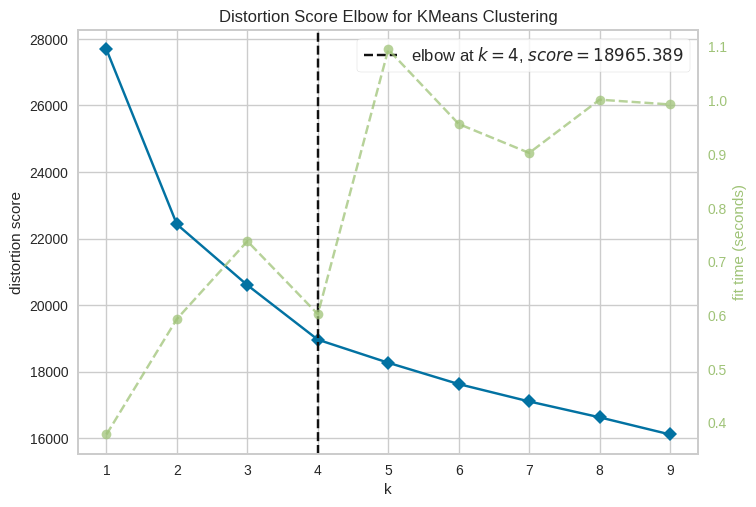

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))

visualizer.fit(df_agrupamento)
visualizer.show()

In [ ]:
kmeans_model = KMeans(n_clusters=4)
cluesters_kmeans = kmeans_model.fit_predict(df_agrupamento)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_sem_unknown['Grupos_do_kmeans'] = np.reshape(cluesters_kmeans, (cluesters_kmeans.shape[0], 1))
df_sem_unknown['Grupos_do_kmeans']

<ipython-input-48-0ae2939c4675>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        3
1        1
2        3
4        3
5        3
        ..
10120    0
10121    1
10122    0
10124    2
10126    2
Name: Grupos_do_kmeans, Length: 7973, dtype: int32

In [ ]:
df_agrupamento['Grupos_do_kmeans'] = np.reshape(cluesters_kmeans, (cluesters_kmeans.shape[0], 1))
df_agrupamento['Grupos_do_kmeans']

0        3
1        1
2        3
4        3
5        3
        ..
10120    0
10121    1
10122    0
10124    2
10126    2
Name: Grupos_do_kmeans, Length: 7973, dtype: int32

In [ ]:
df_label = df_agrupamento.assign(Grupos_do_kmeans=df_agrupamento['Grupos_do_kmeans']).groupby('Grupos_do_kmeans').mean().transpose().rename(columns={0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}).reset_index()
df_label = df_label.append(df_label.iloc[0, :])
df_label

<ipython-input-50-2049cf9fbe6d>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Grupos_do_kmeans,index,A,B,C,D
0,Idade,0.425832,0.424284,0.446045,0.436784
1,Número de dependentes,0.454910,0.461098,0.470206,0.476625
2,Meses desde o registro,0.533622,0.526317,0.545405,0.533860
3,Número total de relações mantidos com a operadora,0.559197,0.555608,0.575036,0.566876
4,Meses inativos dentre os 12 últimos,0.389853,0.396293,0.389527,0.387753
5,Número de contatos nos últimos 12 meses,0.412552,0.408494,0.396381,0.422257
6,Contagem total das transações,0.441272,0.453927,0.414074,0.384826
7,Contagem total alterada do 4º para o 1º trimes...,0.028215,0.021117,0.030448,0.034416
8,Limite do cartão,0.365829,0.117770,0.097205,0.311948
9,Saldo rotativo total,0.443087,0.453891,0.458047,0.497363


In [ ]:
fig = make_subplots(rows=1, cols=4, specs=[[{'type': 'polar'}]*4]*1)

fig.add_trace(go.Scatterpolar(r=df_label['A'],
                              theta=df_label['index'],
                              # fill='toself',
                              name='Cluster A'),
              1, 1)

fig.add_trace(go.Scatterpolar(r=df_label['B'],
                              theta=df_label['index'],
                              # fill='toself',
                              name='Cluster B'),
              1, 2)

fig.add_trace(go.Scatterpolar(r=df_label['C'],
                              theta=df_label['index'],
                              # fill='toself',
                              name='Cluster C'),
              1, 3)

fig.add_trace(go.Scatterpolar(r=df_label['D'],
                              theta=df_label['index'],
                              # fill='toself',
                              name='Cluster D'),
              1, 4)

fig.update_traces(fill='toself')

fig.update_layout(
    polar1=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1])),
    polar2=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1])),
    polar3=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1])),
    polar4=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1])),
    showlegend=False)

fig.show()

## DBSCAN

## HDBSCAN